In [1]:
pip install keras-facenet scikit-learn opencv-python matplotlib tqdm


Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import cv2
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from keras_facenet import FaceNet

# Step 1: Load LFW Dataset
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
X_gray = lfw.images  # shape: (n_samples, 62, 47)
y = lfw.target
target_names = lfw.target_names

# Step 2: Convert to RGB 160x160
X_rgb = []

for i, img in enumerate(X_gray):
    try:
        img = np.asarray(img)

        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)

        # Ensure correct shape
        if img.ndim != 2:
            raise ValueError(f"Image at index {i} is not grayscale.")

        # Resize to (160,160)
        resized = cv2.resize(img, (160, 160), interpolation=cv2.INTER_AREA)

        # Convert to 3-channel RGB
        rgb = cv2.cvtColor(resized, cv2.COLOR_GRAY2RGB)

        X_rgb.append(rgb)
    except Exception as e:
        print(f"⚠️ Skipping image {i}: {e}")

X_rgb = np.array(X_rgb)
print(f"✅ Final shape: {X_rgb.shape}")



✅ Final shape: (3023, 160, 160, 3)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_rgb, y[:len(X_rgb)], test_size=0.2, stratify=y[:len(X_rgb)], random_state=42
)

# Load FaceNet
embedder = FaceNet()



# Generate Embeddings
train_embeddings = embedder.embeddings(X_train)
test_embeddings = embedder.embeddings(X_test)


76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(train_embeddings, y_train)

# Predict
y_pred = knn.predict(test_embeddings)
acc = accuracy_score(y_test, y_pred)

print(f"✅ Face Recognition Accuracy on LFW: {acc*100:.2f}%")


✅ Face Recognition Accuracy on LFW: 99.50%


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=1, metric='cosine')
knn.fit(train_embeddings, y_train)

# Predict
y_pred = knn.predict(test_embeddings)
acc = accuracy_score(y_test, y_pred)

print(f"✅ Face Recognition Accuracy on LFW: {acc*100:.2f}%")


✅ Face Recognition Accuracy on LFW: 99.50%


In [30]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
                           precision    recall  f1-score   support

         Alejandro Toledo       1.00      1.00      1.00         8
             Alvaro Uribe       1.00      1.00      1.00         7
          Amelie Mauresmo       1.00      1.00      1.00         4
             Andre Agassi       1.00      1.00      1.00         7
           Angelina Jolie       1.00      1.00      1.00         4
             Ariel Sharon       1.00      1.00      1.00        16
    Arnold Schwarzenegger       1.00      1.00      1.00         8
     Atal Bihari Vajpayee       1.00      1.00      1.00         5
             Bill Clinton       1.00      1.00      1.00         6
             Carlos Menem       1.00      1.00      1.00         4
             Colin Powell       1.00      1.00      1.00        47
            David Beckham       1.00      1.00      1.00         6
          Donald Rumsfeld       1.00      0.96      0.98        24
         George Robertson       1.00  

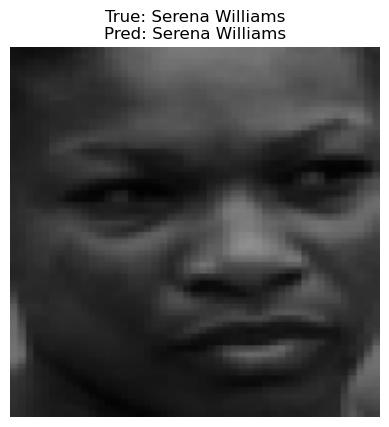

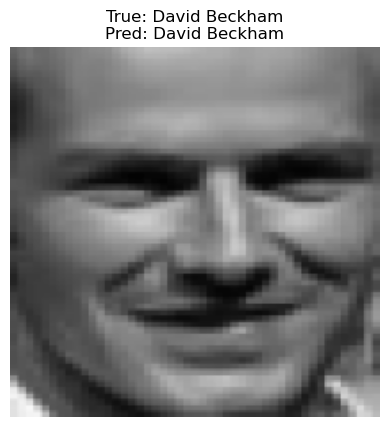

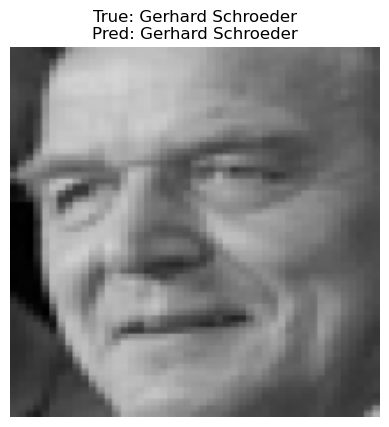

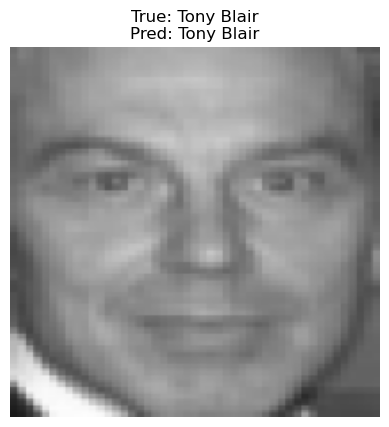

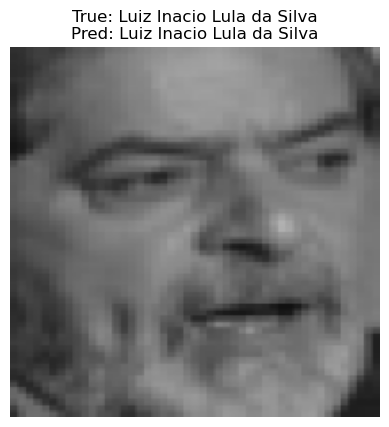

In [32]:
import matplotlib.pyplot as plt

def show_preds(n=10):
    for i in range(n):
        plt.imshow(X_test[i])
        plt.title(f"True: {target_names[y_test[i]]}\nPred: {target_names[y_pred[i]]}")
        plt.axis("off")
        plt.show()

show_preds(5)
